In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd

#查看tf 和 keras 的版本
print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing
#导入加利福利亚的房价信息

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
# 切分训练集，测试集
from sklearn.model_selection import train_test_split

x_train_all ,x_test ,y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_valid_scaler = scaler.fit_transform(x_valid)
x_test_scaler = scaler.fit_transform(x_test)

In [15]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = x_train.shape[1:]),
    keras.layers.Dense(1),
])

model.summary()
model.compile(loss="mean_squared_error", optimizer='SGD')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=0.000001)]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train_scaler, y_train,
                   validation_data = (x_valid_scaler,y_valid),
                    epochs = 100,
                    callbacks = callbacks             
                   )

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.7162 - accuracy: 0.0029 - val_loss: 0.8061 - val_accuracy: 0.0023
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6916 - accuracy: 0.0031 - val_loss: 0.4896 - val_accuracy: 0.0023
Epoch 3/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4557 - accuracy: 0.0031 - val_loss: 0.4371 - val_accuracy: 0.0023
Epoch 4/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4470 - accuracy: 0.0031 - val_loss: 0.4245 - val_accuracy: 0.0023
Epoch 5/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4197 - accuracy: 0.0031 - val_loss: 0.4141 - val_accuracy: 0.0023
Epoch 6/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4153 - accuracy: 0.0031 - val_loss: 0.4072 - val_accuracy: 0.0023
Epoch 7/100
11610/11610 [==========================

In [ ]:
print(history.history)

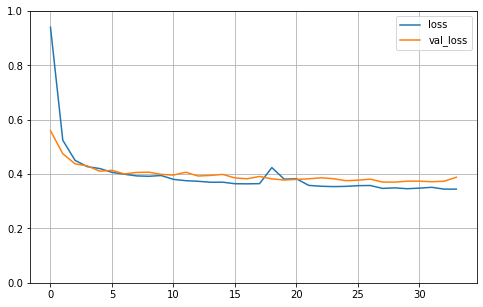

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [14]:
model.evaluate(x_test_scaler, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.4216


0.42158795382625375